https://cran.r-project.org/web/packages/ggdag/vignettes/intro-to-dags.html

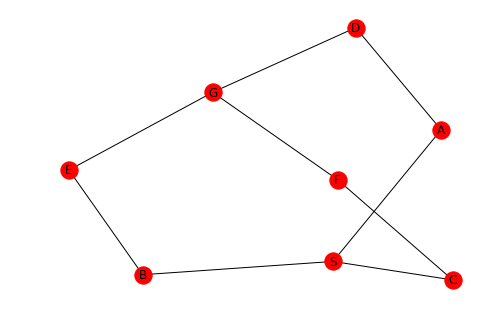

In [54]:
import networkx as nx
#import matplotlib.pyplot as plt

G = {
    'S' : ['A', 'B', 'C'],
    'A' : ['D', 'S'],
    'B' : ['E', 'S'],
    'C' : ['F', 'S'],
    'D' : ['G', 'A'],
    'E' : ['G', 'B'],
    'F' : ['G', 'C'],
    'G' : ['D', 'E', 'F']
}

# g = nx.DiGraph(G)
g = nx.Graph(G)
nx.draw(g,with_labels=True)

[DFS](https://github.com/TheAlgorithms/Python/blob/master/Graphs/DFS.py)

```
DFS(graph G, start vertex s):
// all nodes initially unexplored
mark s as explored
for every edge (s, v):
    if v unexplored:
        DFS(G, v)
```

<img src=dfs.png>

[BFS](https://github.com/TheAlgorithms/Python/blob/master/Graphs/BFS.py)

```
BFS(graph G, start vertex s):
// all nodes initially unexplored
mark s as explored
let Q = queue data structure, initialized with s
while Q is non-empty:
    remove the first node of Q, call it v
    for each edge(v, w):  // for w in graph[v]
        if w unexplored:
            mark w as explored
            add w to Q (at the end)
```

<img src=bfs.png>

In [55]:
def dfs(graph, start, target=None):
    """The DFS function simply calls itself recursively for every unvisited child of its argument. We can emulate that
     behaviour precisely using a stack of iterators. Instead of recursively calling with a node, we'll push an iterator
      to the node's children onto the iterator stack. When the iterator at the top of the stack terminates, we'll pop
       it off the stack."""
    explored, stack = [], []
    explored.append(start)
    if target == explored[-1]: return explored
    stack.append(start)
    while stack:
        v = stack.pop()  # the only difference from BFS is to pop last element here instead of first one
        if target in explored:
            break
        for w in graph[v]:
            if w not in explored:
                explored.append(w)
                if target == explored[-1]: return explored
                stack.append(w)
    return explored

def bfs(graph, start, target=None):
    explored, queue = [], []
    explored.append(start)
    if target == explored[-1]: return explored
    queue.append(start)
    while queue:
        v = queue.pop(0)     # FIFO
        for w in graph[v]:
            if w not in explored:
                explored.append(w)
                if target == explored[-1]: return explored
                queue.append(w)
    return explored

In [56]:
print(dfs(G2, 'S'))

['S', 'A', 'B', 'C', 'F', 'G', 'D', 'E']


In [57]:
print(bfs(G2, 'S'))

['S', 'A', 'B', 'C', 'D', 'E', 'F', 'G']


In [58]:
print(bfs(G2, 'S', 'F'))

['S', 'A', 'B', 'C', 'D', 'E', 'F']


In [59]:
print(dfs(G2, 'S', 'F'))

['S', 'A', 'B', 'C', 'F']
